In [14]:
# Do it on a better dataset. Something education related, clean, easy to knock out. 

In [15]:
# Questions to answer to make sure you understand the data: Why does Shucked Weight have such a strong Beta weight but the lowest. correlation with Rings? What does that mean?
## It contributes the most to the regression, but correlates the least with Rings directly?  The regression is likely superio because it considers the other variables all together, unlike the correlation matrix.  Should I use the one Principle Component to do anything?

In [16]:

# It will also be good to sanity check this is the regular way to do regression. It's like datacamp does, so you are in a ballpark, but check with blogs, and chatGPT, and other resources

In [17]:
# Well, I've somehow forgoten the y_pred part of regression. That's a big deal. I suppose the scikit learn documentation https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html is the best fierast place to lok ther. 


In [18]:
# Time to rubber duck with abalone (the slidedeck mostlyz0 again)
# Scatterplot of each variable is nice
# REQUESTS: Length x Rings for each of male and female
# Beta coeffceiencvte needs to bedispayed raw, and standarized, and including significant values. The main question is what vairalb epredicts rings the best, whihcv is the betaa coefficent.

In [19]:
# Also to do:
# Compare your work to https://medium.com/swlh/abalone-sex-classification-via-physical-measurements-r-3b72526d5326
# and https://www.kaggle.com/code/miksaas/abalone-eda-regression-pca-classification/notebook 


In [20]:
# Predictor Variable details

# Sex / nominal / -- / M, F, and I (infant)
# Length / continuous / mm / Longest shell measurement
# Diameter / continuous / mm / perpendicular to length
# Height / continuous / mm / with meat in shell
# Whole weight / continuous / grams / whole abalone
# Shucked weight / continuous / grams / weight of meat
# Viscera weight / continuous / grams / gut weight (after bleeding)
# Shell weight / continuous / grams / after being dried

# Target variable:
# Rings / integer / -- / +1.5 gives the age in years

In [21]:
# Dataset url:  https://archive.ics.uci.edu/ml/datasets/abalone


In [22]:
# PLAN OF ATTACK (flesh out)
# IMPORT DATA
# EXPLORE, including initial visualizations
# CLEAN including handline outliers, null values, format data as correct dtype, etc
# EXPLORE AGAIN
# MODEL. Check that assumptions are met
## PCA, Linear Regression
# INTERPRET RESULTS. Final visualizations, plain-speech results via slidedeck: https://docs.google.com/presentation/d/1AhuDJJaoszWGqS6jctuePpCjjWkITcbYWKu7Q-LJuD8/edit#slide=id.g21650cc24e6_0_2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
pd.set_option("display.float_format", lambda x: "%.5f" % x) # To get out of scientific notation.  Use pd.reset_option('display.float_format') to reset back to the default

In [25]:
# IMPORT the abalone dataset 

abalone_data = pd.read_csv("/home/corbiep/local/abalone.data", names=["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"])

In [26]:
# EXPLORE the dataset

abalone_data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.45500,0.36500,0.09500,0.51400,0.22450,0.10100,0.15000,15
1,M,0.35000,0.26500,0.09000,0.22550,0.09950,0.04850,0.07000,7
2,F,0.53000,0.42000,0.13500,0.67700,0.25650,0.14150,0.21000,9
3,M,0.44000,0.36500,0.12500,0.51600,0.21550,0.11400,0.15500,10
4,I,0.33000,0.25500,0.08000,0.20500,0.08950,0.03950,0.05500,7


In [27]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [28]:
abalone_data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.00000,4177.00000,4177.00000,4177.00000,4177.00000,4177.00000,4177.00000,4177.00000
mean,0.52399,0.40788,0.13952,0.82874,0.35937,0.18059,0.23883,9.93368
std,0.12009,0.09924,0.04183,0.49039,0.22196,0.10961,0.13920,3.22417
min,0.07500,0.05500,0.00000,0.00200,0.00100,0.00050,0.00150,1.00000
25%,0.45000,0.35000,0.11500,0.44150,0.18600,0.09350,0.13000,8.00000
50%,0.54500,0.42500,0.14000,0.79950,0.33600,0.17100,0.23400,9.00000
75%,0.61500,0.48000,0.16500,1.15300,0.50200,0.25300,0.32900,11.00000
max,0.81500,0.65000,1.13000,2.82550,1.48800,0.76000,1.00500,29.00000


In [29]:
# Check for nulls
# If there are nulls, use isnull().sum() and splicing using isnull (ex: cr_data[pd.isnull(cr_data["Ring 0 MSR"])]), to find and explore, and dropna() to remove

abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [30]:
# Spot checking by hand

abalone_data.iloc[100:110, :]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
100,I,0.36000,0.26500,0.09500,0.23150,0.10500,0.04600,0.07500,7
101,M,0.55000,0.43500,0.14500,0.84300,0.32800,0.19150,0.25500,15
102,M,0.53000,0.43500,0.16000,0.88300,0.31600,0.16400,0.33500,15
103,M,0.53000,0.41500,0.14000,0.72400,0.31050,0.16750,0.20500,10
104,M,0.60500,0.47000,0.16000,1.17350,0.49750,0.24050,0.34500,12
105,F,0.52000,0.41000,0.15500,0.72700,0.29100,0.18350,0.23500,12
106,F,0.54500,0.43000,0.16500,0.80200,0.29350,0.18300,0.28000,11
107,F,0.50000,0.40000,0.12500,0.66750,0.26100,0.13150,0.22000,10
108,F,0.51000,0.39000,0.13500,0.63350,0.23100,0.17900,0.20000,9
109,F,0.43500,0.39500,0.10500,0.36350,0.13600,0.09800,0.13000,9


In [31]:
# Choosing the most appropriate model and checking model assumptions: (from Andy Fields) and https://people.duke.edu/~rnau/testing.htm

# Consider if there is a more appropriate model beside the linear model?

# Assumptions:
## Note that most of the tests for these assumptions (like K-S), are themselves NHST and are therefore subject to those issues. The best option is to look at all available evidence, including thes tests, plots, etc, and make an informed. decision)

# Additivity and linearity:  Linearity refers to the property of a mathematical relationship where the response variable (also known as the dependent variable or output) is directly proportional to the predictor variables (also known as the independent variables or inputs). In other words, a linear relationship is one where the output can be represented as a straight line when plotted against the input
## Additivity refers to the property of a mathematical relationship where the effect of one predictor variable on the response variable is independent of the values of the other predictor variables. In other words, the effect of each predictor variable on the response variable can be considered separately, without taking into account the values of the other predictor variables.
## How to test for it: Residual plots: Plot the residuals (the differences between the predicted values and the actual values) against the predicted values. If the residuals are randomly distributed around zero and do not form any patterns, it is an indication that the assumptions of additivity and linearity are met. nonlinearity is usually most evident in a plot of observed versus predicted values or a plot of residuals versus predicted values, which are a part of standard regression output. The points should be symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter plot, with a roughly constant variance.  (The residual-versus-predicted-plot is better than the observed-versus-predicted plot for this purpose, because it eliminates the visual distraction of a sloping pattern.)  Look carefully for evidence of a "bowed" pattern, indicating that the model makes systematic errors whenever it is making unusually large or small predictions. In multiple regression models, nonlinearity or nonadditivity may also be revealed by systematic patterns in plots of the residuals versus individual independent variables.
### Scatter plots: Creating scatter plots of the independent variables against the dependent variable can also help to detect any patterns that suggest non-linearity or non-additivity.
## What happens if it's violated: The Linear Regression model might not accurately describe the variable. I need to learn more to understand how bad the problem may be.
## Is it typically violated in real life? Need to do more looking.
## How to remedy: consider applying a nonlinear transformation to the dependent and/or independent variables if you can think of a transformation that seems appropriate. (Don’t just make something up!) For example, if the data are strictly positive, the log transformation is an option.  (The logarithm base does not matter--all log functions are same up to linear scaling--although the natural log is usually preferred because small changes in the natural log are equivalent to percentage changes.  See these notes for more details.)  If a log transformation is applied to the dependent variable only, this is equivalent to assuming that it grows (or decays) exponentially as a function of the independent variables.  If a log transformation is applied to both the dependent variable and the independent variables, this is equivalent to assuming that the effects of the independent variables are multiplicative rather than additive in their original units. This means that, on the margin, a small percentage change in one of the independent variables induces a proportional percentage change in the expected value of the dependent variable, other things being equal.  Models of this kind are commonly used in modeling price-demand relationships, as illustrated on the beer sales example on this web site.
### Another possibility to consider is adding another regressor that is a nonlinear function of one of the other variables. For example, if you have regressed Y on X, and the graph of residuals versus predicted values suggests a parabolic curve, then it may make sense to regress Y on both X and X^2 (i.e., X-squared). The latter transformation is possible even when X and/or Y have negative values, whereas logging is not.  Higher-order terms of this kind (cubic, etc.) might also be considered in some cases.  But don’t get carried away!  This sort of "polynomial curve fitting" can be a nice way to draw a smooth curve through a wavy pattern of points (in fact, it is a trend-line option on scatterplots on Excel), but it is usually a terrible way to extrapolate outside the range of the sample data.
### Finally, it may be that you have overlooked some entirely different independent variable that explains or corrects for the nonlinear pattern or interactions among variables that you are seeing in your residual plots. In that case the shape of the pattern, together with economic or physical reasoning, may suggest some likely suspects.  For example, if the strength of the linear relationship between Y and X1 depends on the level of some other variable X2, this could perhaps be addressed by creating a new independent variable that is the product of X1 and X2.  In the case of time series data, if the trend in Y is believed to have changed at a particular point in time, then the addition of a piecewise linear trend variable (one whose string of values looks like 0, 0, …, 0, 1, 2, 3, … ) could be used to fit the kink in the data.  Such a variable can be considered as the product of a trend variable and a dummy variable.  Again, though, you need to beware of overfitting the sample data by throwing in artificially constructed variables that are poorly motivated.  At the end of the day you need to be able to interpret the model and explain (or sell) it to others

## Normality of the sampling distribution of residuals: The data does not need to be normal. The sampling distribution must be normal, which is typically gotten via the central limit theorem (i.e. if we have enough samples, and they are random, and they are large enough, all sampling distributions will be normal centered around the population mean.)
## How to test for it: visualize the sampling distribution. P-P plot (or Q-Q plot). The NHST tests are considered to have too many false positives, i.e. normality of errors is often a little violated.  Anderson-Darling test (generallt considered the best), beating Kolmogrov-Smirnov (large sample sizes) or Shapiro Wilk (small sample sizes) tests.
## What happens if it's violated: Cannot use any parametric tests, including most significance tests or confidence intervals (are there non-parametric versions of these?)
##Is it typically violated in real life? Yes, a little. We use the CLT to ensure it is not too much.
## How to remedy: TLDR: examine, consider non-linear models, consider nonlinear transformations: How to fix: violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems. In the case of the two normal quantile plots above, the second model was obtained applying a natural log transformation to the variables in the first one.
### The dependent and independent variables in a regression model do not need to be normally distributed by themselves--only the prediction errors need to be normally distributed.  (In fact, independent variables do not even need to be random, as in the case of trend or dummy or treatment or pricing variables.)  But if the distributions of some of the variables that are random are extremely asymmetric or long-tailed, it may be hard to fit them into a linear model whose errors will be normally distributed, and explaining the shape of their distributions may be an interesting topic all by itself.  Keep in mind that the normal error assumption is usually justified by appeal to the central limit theorem, which holds in the case where many random variations are added together.  If the underlying sources of randomness are not interacting additively, this argument fails to hold.
### Another possibility is that there are two or more subsets of the data having different statistical properties, in which case separate models should be built, or else some data should merely be excluded, provided that there is some a priori criterion that can be applied to make this determination.
###In some cases, the problem with the error distribution is mainly due to one or two very large errors. Such values should be scrutinized closely: are they genuine (i.e., not the result of data entry errors), are they explainable, are similar events likely to occur again in the future, and how influential are they in your model-fitting results? If they are merely errors or if they can be explained as unique events not likely to be repeated, then you may have cause to remove them. In some cases, however, it may be that the extreme values in the data provide the most useful information about values of some of the coefficients and/or provide the most realistic guide to the magnitudes of forecast errors.
### Important -  this assumption the the normality of the sampling distribution of errors. Andy Fields 4th edition does not make this distinction clearly enough.

## Homogenity of variance: The variance should be the same at different levels of the target variable.
## How to test for it: Examine a plot of standardized residuals vs predicted values (this is the same as graph to take a look at linearity). Levene's test (controversial, and only required if you have unequal greoup sizes).
## What happens if it's violated: Sig tests and CI's will be artificially wide or narrow, esp for predictions outside the data range of the data studied. The sections of data with the larger variances will be overrepresented.
## Is it typically violated in real life? I'm not sure. I think, like the others, it often is a little bit. 
## How to remedy: Check Fields text for more. If the dependent variable is strictly positive and if the residual-versus-predicted plot shows that the size of the errors is proportional to the size of the predictions (i.e., if the errors seem consistent in percentage rather than absolute terms), a log transformation applied to the dependent variable may be appropriate.

## Independence: No correlation between the errors
### How to test for it: [Some kind of] residuals plot. Durbin-Watson. Ideally, most of the residual autocorrelations should fall within the 95% confidence bands around zero, which are located at roughly plus-or-minus 2-over-the-square-root-of-n, where n is the sample size. Thus, if the sample size is 50, the autocorrelations should be between +/- 0.3. If the sample size is 100, they should be between +/- 0.2.
### What happens if it's violated: [Check Fields text]
### Is it typically violated in real life? All the time. Lots of partial autocorrelation
#### How to remedy: Minor violations can indicate the need for a minor fine tuning of the model. [Check Fields text]. Major violations usually mean you need to use a different kind of model [Are there models that work as aleternatives? ]

In [32]:
# Remove outliers

# Also explore influential cases, using Cook's distance and PCA

In [33]:
abalone_data.std()

Length           0.12009
Diameter         0.09924
Height           0.04183
Whole Weight     0.49039
Shucked Weight   0.22196
Viscera Weight   0.10961
Shell Weight     0.13920
Rings            3.22417
dtype: float64

In [34]:
Length_outlier = abalone_data["Length"].mean() + (abalone_data["Length"].std() * 2.5)
Diameter_outlier = abalone_data["Diameter"].mean() + (
    abalone_data["Diameter"].std() * 2.5
)
Height_outlier = abalone_data["Height"].mean() + (abalone_data["Height"].std() * 2.5)
Whole_Weight_outlier = abalone_data["Whole Weight"].mean() + (
    abalone_data["Whole Weight"].std() * 2.5
)
Shucked_Weight_outlier = abalone_data["Shucked Weight"].mean() + (
    abalone_data["Shucked Weight"].std() * 2.5
)
Viscera_Weight_outlier = abalone_data["Viscera Weight"].mean() + (
    abalone_data["Viscera Weight"].std() * 2.5
)
Shell_Weight_outlier = abalone_data["Shell Weight"].mean() + (
    abalone_data["Shell Weight"].std() * 2.5
)

Rings_outlier = abalone_data["Rings"].mean() + (abalone_data["Rings"].std() * 2.5)

In [35]:
print(Length_outlier) # sanity check

0.8242243810050083


In [36]:
abalone_data.info() # There are 4177 before outlier removal. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [37]:
abalone_data = abalone_data.loc[abalone_data["Length"] < Length_outlier] # The order of outlier removal should not matter, because you calculated the outlier threshold values all at once beforehand. 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [38]:
abalone_data = abalone_data.loc[abalone_data["Diameter"] < Diameter_outlier] # There is probably a most efficient way of doing this
abalone_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [39]:
abalone_data = abalone_data.loc[abalone_data["Height"] < Height_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4172 non-null   object 
 1   Length          4172 non-null   float64
 2   Diameter        4172 non-null   float64
 3   Height          4172 non-null   float64
 4   Whole Weight    4172 non-null   float64
 5   Shucked Weight  4172 non-null   float64
 6   Viscera Weight  4172 non-null   float64
 7   Shell Weight    4172 non-null   float64
 8   Rings           4172 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 325.9+ KB


In [40]:
abalone_data = abalone_data.loc[abalone_data["Whole Weight"] < Whole_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4112 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4112 non-null   object 
 1   Length          4112 non-null   float64
 2   Diameter        4112 non-null   float64
 3   Height          4112 non-null   float64
 4   Whole Weight    4112 non-null   float64
 5   Shucked Weight  4112 non-null   float64
 6   Viscera Weight  4112 non-null   float64
 7   Shell Weight    4112 non-null   float64
 8   Rings           4112 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 321.2+ KB


In [41]:
abalone_data = abalone_data.loc[abalone_data["Shucked Weight"] < Shucked_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4091 non-null   object 
 1   Length          4091 non-null   float64
 2   Diameter        4091 non-null   float64
 3   Height          4091 non-null   float64
 4   Whole Weight    4091 non-null   float64
 5   Shucked Weight  4091 non-null   float64
 6   Viscera Weight  4091 non-null   float64
 7   Shell Weight    4091 non-null   float64
 8   Rings           4091 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 319.6+ KB


In [42]:
abalone_data = abalone_data.loc[abalone_data["Viscera Weight"] < Viscera_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4071 non-null   object 
 1   Length          4071 non-null   float64
 2   Diameter        4071 non-null   float64
 3   Height          4071 non-null   float64
 4   Whole Weight    4071 non-null   float64
 5   Shucked Weight  4071 non-null   float64
 6   Viscera Weight  4071 non-null   float64
 7   Shell Weight    4071 non-null   float64
 8   Rings           4071 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 318.0+ KB


In [43]:
abalone_data = abalone_data.loc[abalone_data["Shell Weight"] < Shell_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4043 non-null   object 
 1   Length          4043 non-null   float64
 2   Diameter        4043 non-null   float64
 3   Height          4043 non-null   float64
 4   Whole Weight    4043 non-null   float64
 5   Shucked Weight  4043 non-null   float64
 6   Viscera Weight  4043 non-null   float64
 7   Shell Weight    4043 non-null   float64
 8   Rings           4043 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 315.9+ KB


In [44]:
abalone_data = abalone_data.loc[abalone_data["Rings"] < Rings_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3921 non-null   object 
 1   Length          3921 non-null   float64
 2   Diameter        3921 non-null   float64
 3   Height          3921 non-null   float64
 4   Whole Weight    3921 non-null   float64
 5   Shucked Weight  3921 non-null   float64
 6   Viscera Weight  3921 non-null   float64
 7   Shell Weight    3921 non-null   float64
 8   Rings           3921 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 306.3+ KB


In [45]:
(4177-3921)/4177

0.06128800574575054

In [46]:
# 6% of the data being outliers is not good, but manageable. Should be investigated more.

In [47]:
abalone_data.corr() # Lots of autocorrelation, will do PCA

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.00000,0.98645,0.89689,0.93381,0.90931,0.90741,0.91502,0.59624
Diameter,0.98645,1.00000,0.90289,0.93438,0.90529,0.90458,0.92296,0.61312
Height,0.89689,0.90289,1.00000,0.88887,0.84185,0.86791,0.89547,0.63246
Whole Weight,0.93381,0.93438,0.88887,1.00000,0.97261,0.96703,0.96126,0.56613
Shucked Weight,0.90931,0.90529,0.84185,0.97261,1.00000,0.93110,0.90004,0.46530
Viscera Weight,0.90741,0.90458,0.86791,0.96703,0.93110,1.00000,0.92124,0.54539
Shell Weight,0.91502,0.92296,0.89547,0.96126,0.90004,0.92124,1.00000,0.63686
Rings,0.59624,0.61312,0.63246,0.56613,0.46530,0.54539,0.63686,1.00000


Text(0, 0.5, 'Whole Weight')

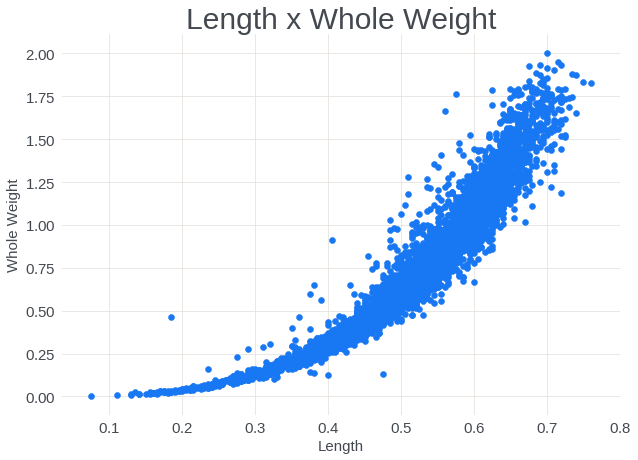

In [48]:
# Scatterplot for Lenght and Whole Weight
## scatter_matrix is also excellent, explore that more.
# You typically want to graph before cleaning and train test splitting, etc, but the more important graph would come at the end

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Length"], abalone_data["Whole Weight"])
plt.title("Length x Whole Weight")
plt.xlabel("Length")
plt.ylabel("Whole Weight")

Text(0, 0.5, 'Rings')

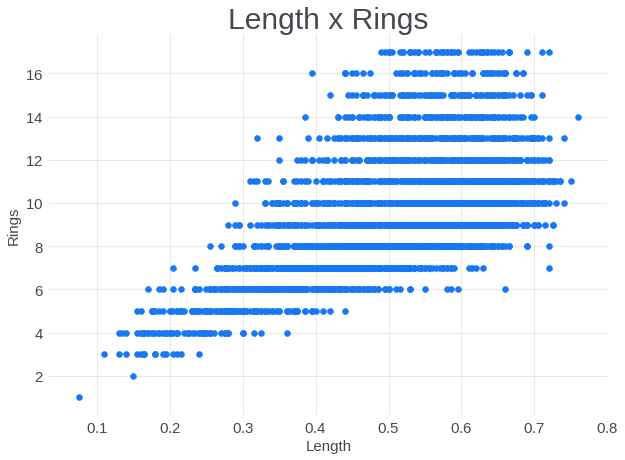

In [49]:
# Scatterplot for Length and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Length"], abalone_data["Rings"])
plt.title("Length x Rings")
plt.xlabel("Length")
plt.ylabel("Rings")

Text(0, 0.5, 'Height(mm)')

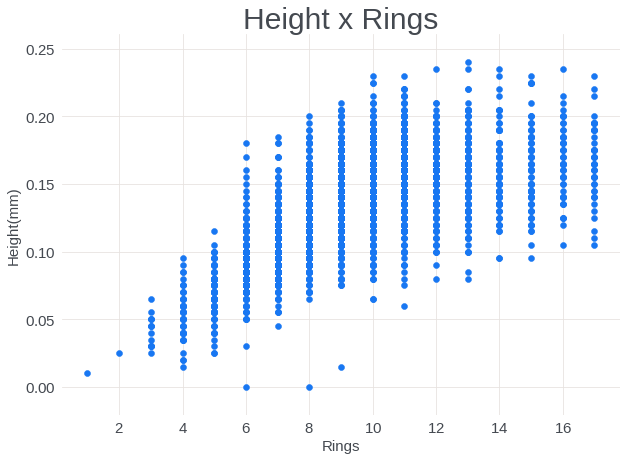

In [50]:
# Scatterplot for Height and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Rings"], abalone_data["Height"])
plt.title("Height x Rings")
plt.xlabel("Rings")
plt.ylabel("Height(mm)")

Text(0, 0.5, 'Shell Weight (grams)')

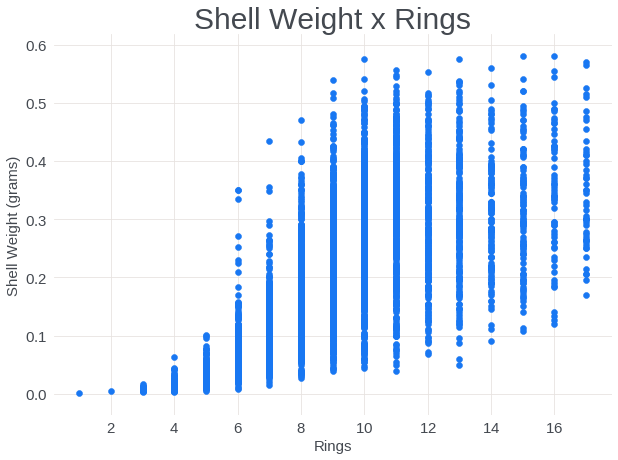

In [51]:
# Scatterplot for Shell Weight and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Rings"], abalone_data["Shell Weight"])
plt.title("Shell Weight x Rings")
plt.xlabel("Rings")
plt.ylabel("Shell Weight (grams)")

Text(0, 0.5, 'Rings')

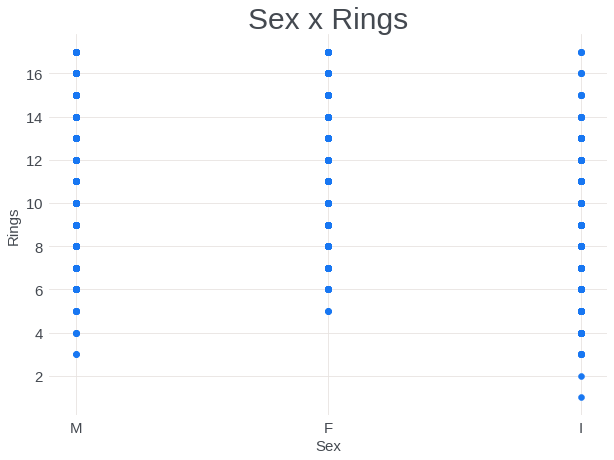

In [52]:
# Scatterplot for Sex and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Sex"], abalone_data["Rings"])
plt.title("Sex x Rings")
plt.xlabel("Sex")
plt.ylabel("Rings")

Text(0, 0.5, 'Rings')

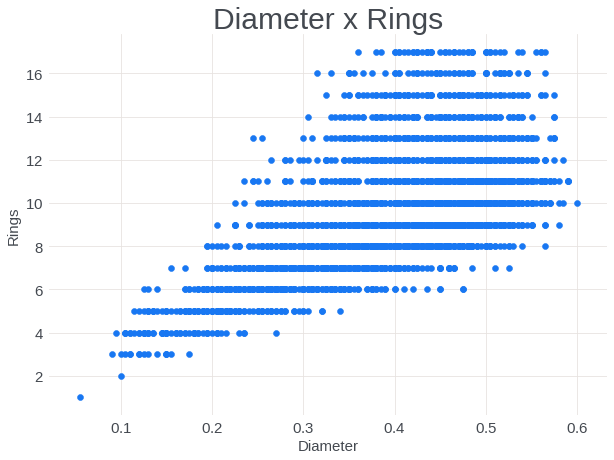

In [54]:
# Scatterplot for Diameter and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Diameter"], abalone_data["Rings"])
plt.title("Diameter x Rings")
plt.xlabel("Diameter")
plt.ylabel("Rings")

Text(0, 0.5, 'Rings')

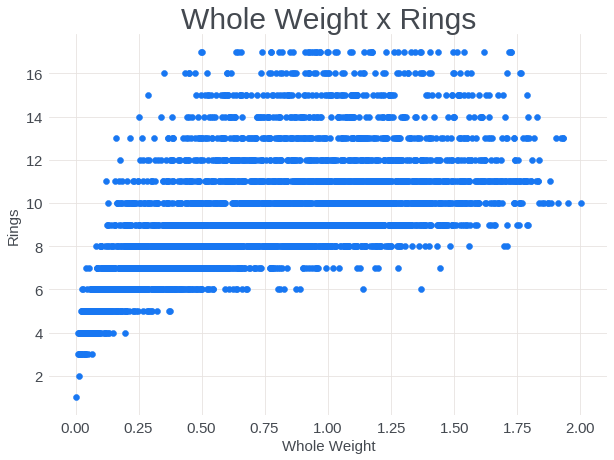

In [55]:
# Scatterplot for Whole Weight and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Whole Weight"], abalone_data["Rings"])
plt.title("Whole Weight x Rings")
plt.xlabel("Whole Weight")
plt.ylabel("Rings")

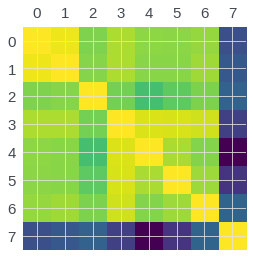

In [56]:
plt.matshow(abalone_data.corr())
plt.show()

In [58]:
abalone_data.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.00000,0.98645,0.89689,0.93381,0.90931,0.90741,0.91502,0.59624
Diameter,0.98645,1.00000,0.90289,0.93438,0.90529,0.90458,0.92296,0.61312
Height,0.89689,0.90289,1.00000,0.88887,0.84185,0.86791,0.89547,0.63246
Whole Weight,0.93381,0.93438,0.88887,1.00000,0.97261,0.96703,0.96126,0.56613
Shucked Weight,0.90931,0.90529,0.84185,0.97261,1.00000,0.93110,0.90004,0.46530
Viscera Weight,0.90741,0.90458,0.86791,0.96703,0.93110,1.00000,0.92124,0.54539
Shell Weight,0.91502,0.92296,0.89547,0.96126,0.90004,0.92124,1.00000,0.63686
Rings,0.59624,0.61312,0.63246,0.56613,0.46530,0.54539,0.63686,1.00000


In [59]:
# PCA

# You are doing all the PCA on a copy of the dataset, before train test split. Is this the correct way to go? Make sure to interpret everything downstream from this partition correctly.
# https://medium.com/data-science-365/principal-component-analysis-18-questions-answered-4abd72041ccd Is a great resource

## Must do all the basic data cleaning you can, and either remove or dummy encode categorical variables. PCA is also unsupervised, so we remove the target variable. PLS is the supervised version of PCA.
# Must also standardize the data.
# Having trobule with lots of correlations between predictor variables. Trying PCA to help. Using the Oreilly book and https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/.
## The idea behind PCA is dimension reduction - to take variables that are correlated with one another and combine them into one variable.
## One thing I don't understand about PCA is: We start with the predictor variables, and combine them into loadings. Two variables seem to generate two loadings. The first loading, Z1, accounts for most of the variance, and Z2 is orthoganal and accounts for the rest. I don't understand this part, what variance is being accounted for by what, and how/
## What is the difference between PCA and factor analysis?
## Consider if PLS is more appropriate here: "Partial least square (PLS) is a supervised alternative to PCA. PLS assigns a higher weight to variables that are strongly related to response variable to determine principal components.""
### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html is a good starting point for exploring PCA vs PLS.

In [60]:
# Remove or dummy encode categorical variables
# For ease of this example, I will remove them. Circle back later and do the correct thing of dummy encoding them. One hot encoder was used by one example here.

#create copy of DataFrame
abalone_data_for_PCA=abalone_data.copy()

del abalone_data_for_PCA["Sex"]
abalone_data_for_PCA.head() # The one categorical variable was removed

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0.45500,0.36500,0.09500,0.51400,0.22450,0.10100,0.15000,15
1,0.35000,0.26500,0.09000,0.22550,0.09950,0.04850,0.07000,7
2,0.53000,0.42000,0.13500,0.67700,0.25650,0.14150,0.21000,9
3,0.44000,0.36500,0.12500,0.51600,0.21550,0.11400,0.15500,10
4,0.33000,0.25500,0.08000,0.20500,0.08950,0.03950,0.05500,7


In [61]:
# Remove the target variable

del abalone_data_for_PCA["Rings"]
abalone_data_for_PCA.head() 

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.45500,0.36500,0.09500,0.51400,0.22450,0.10100,0.15000
1,0.35000,0.26500,0.09000,0.22550,0.09950,0.04850,0.07000
2,0.53000,0.42000,0.13500,0.67700,0.25650,0.14150,0.21000
3,0.44000,0.36500,0.12500,0.51600,0.21550,0.11400,0.15500
4,0.33000,0.25500,0.08000,0.20500,0.08950,0.03950,0.05500


In [62]:
# Now scale. What scaler to use? StandardScalar looks like it will work, but circle back and double check what is used in some real examples. 

scale = StandardScaler()
scaled_abalone_data_for_PCA = scale.fit_transform(abalone_data_for_PCA)

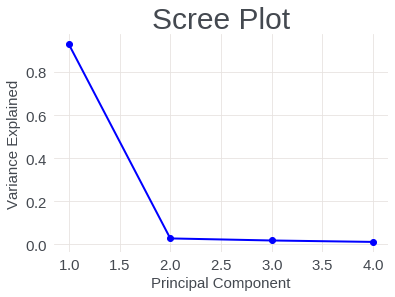

In [63]:
# How should I select the right number of n components? If the primary goal is for visualization, then select 2 or 3. You can also input a decimal instead of an integer, and the algorithm will find the number of components that captures that much variance, which is neat. 
## The best method is to plot Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components. . https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
## Plot code from https://medium.com/data-science-365/principal-component-analysis-18-questions-answered-4abd72041ccd 

from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=4) #I think here you just pick 'enough' compoents to get going, and then plot them out. 

#fit PCA model to data
scaled_abalone_data_for_PCA_reduced = pca.fit_transform(scaled_abalone_data_for_PCA) # why fit transform and not just fit?


import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Here the graph is showing one good component. How to know which component it again

In [64]:
# Get the PCA loadings. This is how you knwo the relationship of the predictor variables to the principle components

loadings = pca.components_

In [65]:
for i, component in enumerate(loadings):
    print(f"Component {i+1}:")
    for j, variable in enumerate(component):
        print(f"Variable {j+1}: {variable:.3f}")
    print()

    # Wow. Just double checkt that Variable 1 = the leftmost variable in the dataframe, and we are all set. 

Component 1:
Variable 1: -0.381
Variable 2: -0.381
Variable 3: -0.365
Variable 4: -0.387
Variable 5: -0.375
Variable 6: -0.378
Variable 7: -0.379

Component 2:
Variable 1: -0.244
Variable 2: -0.280
Variable 3: -0.639
Variable 4: 0.303
Variable 5: 0.489
Variable 6: 0.351
Variable 7: -0.000

Component 3:
Variable 1: 0.547
Variable 2: 0.500
Variable 3: -0.526
Variable 4: -0.119
Variable 5: 0.112
Variable 6: -0.230
Variable 7: -0.306

Component 4:
Variable 1: 0.013
Variable 2: 0.095
Variable 3: -0.417
Variable 4: 0.049
Variable 5: -0.450
Variable 6: -0.088
Variable 7: 0.778



In [66]:
# Big question - do I then use the principle components in the model? Or not?

In [67]:
# MODEL

from sklearn.model_selection import train_test_split

abalone_data_train, abalone_data_test = train_test_split(abalone_data, test_size=0.25, random_state=18)

In [68]:
abalone_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 120 to 3605
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2940 non-null   object 
 1   Length          2940 non-null   float64
 2   Diameter        2940 non-null   float64
 3   Height          2940 non-null   float64
 4   Whole Weight    2940 non-null   float64
 5   Shucked Weight  2940 non-null   float64
 6   Viscera Weight  2940 non-null   float64
 7   Shell Weight    2940 non-null   float64
 8   Rings           2940 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 229.7+ KB


In [69]:
abalone_data_train.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
120,F,0.47000,0.36500,0.10500,0.42050,0.16300,0.10350,0.14000,9
3064,M,0.63500,0.50000,0.18000,1.15400,0.44050,0.23150,0.38700,9
3343,F,0.45500,0.36500,0.11000,0.38500,0.16600,0.04600,0.13450,13
2263,F,0.62000,0.51000,0.15000,1.45600,0.58100,0.28750,0.32000,13
1112,F,0.52000,0.46000,0.15000,1.01900,0.52300,0.19850,0.25400,7


In [70]:
# dummy encode the categorical variables

abalone_data_train = pd.get_dummies(abalone_data_train)
abalone_data_test = pd.get_dummies(abalone_data_test)

In [71]:
abalone_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 120 to 3605
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2940 non-null   float64
 1   Diameter        2940 non-null   float64
 2   Height          2940 non-null   float64
 3   Whole Weight    2940 non-null   float64
 4   Shucked Weight  2940 non-null   float64
 5   Viscera Weight  2940 non-null   float64
 6   Shell Weight    2940 non-null   float64
 7   Rings           2940 non-null   int64  
 8   Sex_F           2940 non-null   uint8  
 9   Sex_I           2940 non-null   uint8  
 10  Sex_M           2940 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 215.3 KB


In [72]:
abalone_data_test = abalone_data_test.reindex(columns = abalone_data_train.columns, fill_value = 0)
# get_dummies makes a new column for each case of categorical data, so it's likely to have a different number of columns in the test set and the training set. Use reindex to adjust the test set to have the same number of columns as the training set, removing unneeded columns. 


In [73]:
# Move the target variable 'Rings' to the end
abalone_data_train = abalone_data_train[[c for c in abalone_data_train if c not in 'Rings'] + ['Rings']]
abalone_data_test = abalone_data_test[[c for c in abalone_data_test if c not in 'Rings'] + ['Rings']]

In [74]:
# create variables separating out the target variable from the others
X_train, y_train = abalone_data_train.iloc[:, :-1], abalone_data_train.iloc[:,[-1]]
X_test, y_test = abalone_data_test.iloc[:, :-1], abalone_data_test.iloc[:,[-1]]

In [75]:
X_train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
120,0.47000,0.36500,0.10500,0.42050,0.16300,0.10350,0.14000,1,0,0
3064,0.63500,0.50000,0.18000,1.15400,0.44050,0.23150,0.38700,0,0,1
3343,0.45500,0.36500,0.11000,0.38500,0.16600,0.04600,0.13450,1,0,0
2263,0.62000,0.51000,0.15000,1.45600,0.58100,0.28750,0.32000,1,0,0
1112,0.52000,0.46000,0.15000,1.01900,0.52300,0.19850,0.25400,1,0,0


In [76]:
X_test.head() #Oooh, this may be it, this has Rings still, the training set doesnt. 

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
3633,0.30000,0.22000,0.06500,0.11950,0.05200,0.01550,0.03500,0,1,0
3303,0.56500,0.45000,0.18500,0.92850,0.30200,0.18050,0.26500,1,0,0
1196,0.71000,0.56000,0.18000,1.65200,0.73500,0.38100,0.45250,1,0,0
1278,0.49500,0.35500,0.12000,0.49650,0.21400,0.10450,0.14950,0,1,0
122,0.51500,0.42500,0.14000,0.76600,0.30400,0.17250,0.25500,1,0,0


In [77]:
# instantiate the scaler. Different scaler choices have various impacts. 
scaler = StandardScaler()

In [78]:
# fit and transform using the scaler
## Do I scale the target variable?
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)  # fit does the calculation to determine how the scaling should be done, and transform does the actual scaling. We want to transform without fitting on the test set to avoid data leakage.

In [79]:
# Instantiate the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [80]:
# Fit
linreg.fit(rescaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Assess accuracy (using https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
y_pred = linreg.predict(rescaled_X_test)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 3.32
Coefficient of determination: 0.54


In [83]:
# Assess accuracy
linreg.score(rescaled_X_train, y_train) #This is the training set score

0.5440229331495297

In [84]:
linreg.score(rescaled_X_test, y_test)  # This is the test set score

# score is R^2, which is between 0 and 1, so something is wrong here. 
## Look at the X test and y test

0.5358935628169763

In [85]:
# Interactions like mediation or moderation

## Statsmodels looks promising: https://www.statsmodels.org/dev/generated/statsmodels.stats.mediation.Mediation.
## https://www.statsmodels.org/dev/examples/notebooks/generated/mediation_survival.html
## https://github.com/kshedden/mediation_workshop
# Mediation is when a variable is a go between/component of the relationship between two other variables.
## In full mediation, a mediator fully explains the relationship between the independent and dependent variable: without the mediator in the model, there is no relationship.
## In partial mediation, there is still a statistical relationship between the independent and dependent variable even when the mediator is taken out of a model: the mediator only partially explains the relationship.
# Moderation is when one variable affects another variable, and that effect is influenced by a third variable.

# This looks hard. Need a tutorial video or something.

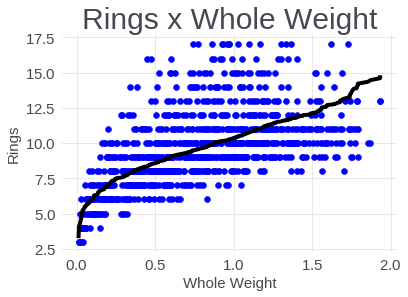

In [102]:
# Plot the scatterplot with regression line

#Whole Weight and Rings are axis-flipped

from matplotlib import pyplot as plt 

sorted_X_test_Whole_Weight = np.sort(X_test["Whole Weight"], axis=0)
# How to sort? Need to sort, but don't know how. Sorting the test set should make the predicted values sorted, which keep the trendline not looking crazy. Make sure that you don't need to also sort the y set, or the training set (your probably do), or that sorting it causes a statistical issue 

# the trendline is all crazy. Should y pred be sorted as well? Trying it (it worked!)
sorted_y_pred = np.sort(y_pred, axis=0)



plt.scatter(X_test["Whole Weight"], y_test, color='b')  
plt.title("Rings x Whole Weight")
plt.ylabel("Rings")
plt.xlabel("Whole Weight")



#Should this scatterplot portion be the test set or the training set? Fairly certain it should be the test set, because that is what we want to display. 

#Note, you can't get a scatterplot of all the columns in X. You need to pick a columns.

# Should this be post scaling things?

plt.plot(sorted_X_test_Whole_Weight, sorted_y_pred, color='k') 
plt.show()





In [87]:
print(f'alpha = {linreg.intercept_}') # Understand this code better. This is supposedly the intercept of the regression line. 

alpha = [9.49897959]


In [88]:
# Some ideas here: https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features
# I am not sure if it's a problem that the above code uses 'X_train' as an argument. It shouldnt be, because it's just getting the column headers from X_train, and the coefficients are coming from 'model' which uses rescaled_X_train
coef_table = pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients": linreg.coef_[0]})

coef_table


,Feature,Coefficients
0,Length,-0.11321
1,Diameter,1.16577
2,Height,0.67580
3,Whole Weight,2.17822
4,Shucked Weight,-3.05857
5,Viscera Weight,-0.53447
6,Shell Weight,1.01377
7,Sex_F,0.14238
8,Sex_I,-0.28036
9,Sex_M,0.14105


Text(0, 0.5, 'Shucked Weight')

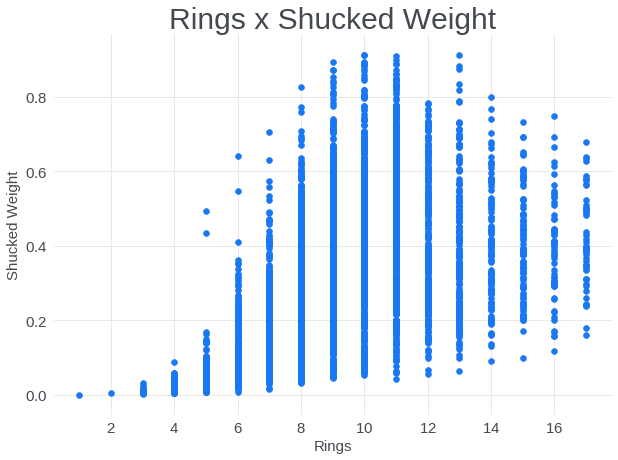

In [89]:
# POST-CLEANING VISUALIZATIONS

# You want to graph the strongest relationships with the target variable. Is that the beta weights? The correlation? Check Fields text and elsewhere. 

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Rings"], abalone_data["Shucked Weight"])
plt.title("Rings x Shucked Weight")
plt.xlabel("Rings")
plt.ylabel("Shucked Weight")

Text(0, 0.5, 'Whole Weight')

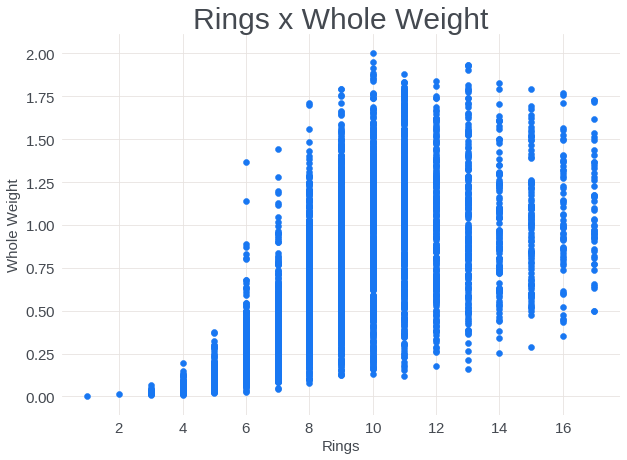

In [90]:
fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Rings"], abalone_data["Whole Weight"])
plt.title("Rings x Whole Weight")
plt.xlabel("Rings")
plt.ylabel("Whole Weight")